## Preprocessing

In [1]:
# Import our dependencies
#import warnings
#warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN', 'NAME', 'SPECIAL_CONSIDERATIONS', 'STATUS'
application_df = application_df.drop(columns=['EIN', 'NAME', 'SPECIAL_CONSIDERATIONS', 'STATUS'])

In [3]:
# Determine the number of unique values in each column.
unique_values_count = application_df.nunique()
unique_values_count

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_type_counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 500

# Create a list of application types to be replaced
application_types_to_replace = application_df['APPLICATION_TYPE'].value_counts()[application_df['APPLICATION_TYPE'].value_counts() < cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts_greater_than_one = classification_counts[classification_counts > 1]
classification_counts_greater_than_one

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classification_cutoff_value = 100

# Create a list of classifications to be replaced
classifications_to_replace = classification_counts[classification_counts < classification_cutoff_value].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: count, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_encoded = pd.get_dummies(application_df)
application_df_encoded

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,108590,1,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,5000,0,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
3,6692,1,False,False,False,True,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,142590,1,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,0,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
34295,5000,0,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
34296,5000,0,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
34297,5000,1,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [10]:
# Split our preprocessed data into our features and target arrays
X = application_df_encoded.drop(columns=['IS_SUCCESSFUL'])
y = application_df_encoded['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                                                y,
                                                                                random_state=42,
                                                                                stratify=y)

In [11]:
# Check data types of X_train and y_train
print(X_train.dtypes)
print(y_train.dtypes)

ASK_AMT                         int64
APPLICATION_TYPE_Other           bool
APPLICATION_TYPE_T10             bool
APPLICATION_TYPE_T19             bool
APPLICATION_TYPE_T3              bool
APPLICATION_TYPE_T4              bool
APPLICATION_TYPE_T5              bool
APPLICATION_TYPE_T6              bool
APPLICATION_TYPE_T7              bool
APPLICATION_TYPE_T8              bool
AFFILIATION_CompanySponsored     bool
AFFILIATION_Family/Parent        bool
AFFILIATION_Independent          bool
AFFILIATION_National             bool
AFFILIATION_Other                bool
AFFILIATION_Regional             bool
CLASSIFICATION_C1000             bool
CLASSIFICATION_C1200             bool
CLASSIFICATION_C1270             bool
CLASSIFICATION_C1700             bool
CLASSIFICATION_C2000             bool
CLASSIFICATION_C2100             bool
CLASSIFICATION_C2700             bool
CLASSIFICATION_C3000             bool
CLASSIFICATION_C4000             bool
CLASSIFICATION_C5000             bool
CLASSIFICATI

In [12]:
# Convert boolean data types to integers in X_train and y_train
X_train = X_train.astype(int)
y_train = y_train.astype(int)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [27]:
# Define the input shape based on the number of features
input_shape = X_train_scaled.shape[1]

# Create an Input layer
input_layer = tf.keras.Input(shape=(input_shape,))

# Define the number of units for the hidden layers
hidden_units = 64

# Add hidden layers
hidden_layer1 = tf.keras.layers.Dense(hidden_units, activation='relu')(input_layer)
hidden_layer2 = tf.keras.layers.Dense(hidden_units, activation='relu')(hidden_layer1)

# Output layer
output_layer = tf.keras.layers.Dense(units=1)(hidden_layer2)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 46)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           3,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,233 (28.25 KB)

 Trainable params: 7,233 (28.25 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# import dependency
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the filepath for saving the weights
filepath = "model.weights.h5"

# Create a ModelCheckpoint callback
# Save the weights every 5 epochs
checkpoint_callback = ModelCheckpoint(filepath, save_weights_only=True, save_best_only=False, save_freq=5)

In [30]:
# Fit the model with the defined callback
history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[checkpoint_callback])

Epoch 1/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7351 - loss: 0.1817 - val_accuracy: 0.7230 - val_loss: 0.1873
Epoch 2/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7423 - loss: 0.1786 - val_accuracy: 0.7226 - val_loss: 0.1880
Epoch 3/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7382 - loss: 0.1810 - val_accuracy: 0.7221 - val_loss: 0.1872
Epoch 4/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7400 - loss: 0.1805 - val_accuracy: 0.7208 - val_loss: 0.1882
Epoch 5/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7459 - loss: 0.1791 - val_accuracy: 0.7223 - val_loss: 0.1869
Epoch 6/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7402 - loss: 0.1796 - val_accuracy: 0.7270 - val_loss: 0.1878
Epoch 7/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7383 - loss: 0.1795 - val_accuracy: 0.7236 - val_loss: 0.1875
Epoch 8/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7335 - loss: 0.1823 - val_accuracy: 0.

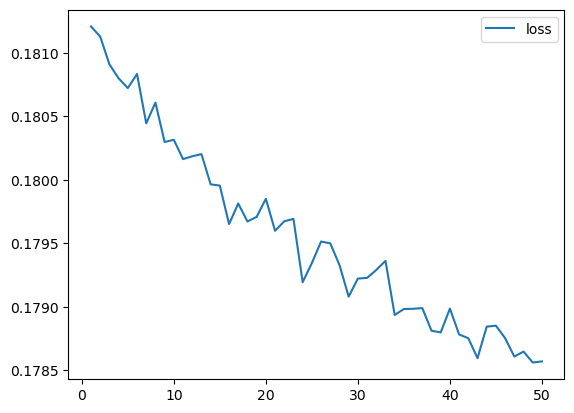

In [33]:
# Import dependency
import matplotlib.pyplot as plt

# Create a DataFrame containing training history
charity_df = pd.DataFrame(history.history)

# Increase the index by 1 to match the number of epochs
charity_df.index += 1

# Plot the loss
charity_df.plot(y="loss")
plt.show()

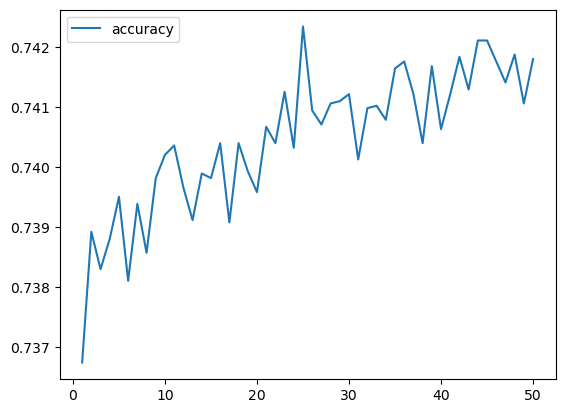

In [34]:
# Plot the accuracy
charity_df.plot(y="accuracy")
plt.show()

In [36]:
# Evaluate the model using the preprocessed test data
model.evaluate(X_test_scaled, y_test)

268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7301 - loss: 0.1859


[0.18777574598789215, 0.7243148684501648]

In [37]:
# Export our model to HDF5 file
# Define the file path for saving the model
model_path = "AlphabetSoupCharity.h5"

# Save the model to HDF5 file
model.save(model_path)

print("Model saved successfully to", model_path)

Model saved successfully to AlphabetSoupCharity.h5
